# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:

# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
   
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)





606

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
import json
url = "http://api.openweathermap.org/data/2.5/weather?"
city = "dikson"

query_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=imperial"
print(query_url)
weather_response = requests.get(query_url)
weather_json = weather_response.json()
print(weather_json)
print(json.dumps(weather_json, indent=4, sort_keys=True))




http://api.openweathermap.org/data/2.5/weather?appid=765fc2c2322fdf430e02390c99bb9cd5&q=dikson&units=imperial
{'coord': {'lon': 80.5464, 'lat': 73.5069}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13n'}], 'base': 'stations', 'main': {'temp': 33.01, 'feels_like': 22.66, 'temp_min': 33.01, 'temp_max': 33.01, 'pressure': 1004, 'humidity': 98, 'sea_level': 1004, 'grnd_level': 999}, 'visibility': 78, 'wind': {'speed': 15.61, 'deg': 194, 'gust': 25.59}, 'snow': {'1h': 0.11}, 'clouds': {'all': 100}, 'dt': 1652480550, 'sys': {'country': 'RU', 'sunrise': 0, 'sunset': 0}, 'timezone': 25200, 'id': 1507390, 'name': 'Dikson', 'cod': 200}
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 73.5069,
        "lon": 80.5464
    },
    "dt": 1652480550,
    "id": 1507390,
    "main": {
        "feels_like": 22.66,
        "grnd_level": 999,
        "humidity": 98,
        "pressure": 1004,
        "sea_level

In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"

latitudes = []
max_temp =[]
windspeed = []
humidity = []
date = []
country = []
cloudiness = []
city_id = []
lons = []
city_names = []

units = "imperial"

for city in cities:
    query_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=imperial"
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    try:
        print(weather_json['coord']['lat'])
        latitudes.append(weather_json['coord']['lat'])
    except KeyError:
        print(f"coord not found")
        pass

    try:
        print(weather_json['main']['temp_max'])
        max_temp.append(weather_json['main']['temp_max'])
    except KeyError:
        print(f"temp not found")
        pass

    try:
        print(weather_json['wind']['speed'])
        windspeed.append(weather_json['wind']['speed'])
    except KeyError:
        print(f"windpseed not found")
        pass

    try:
        print(weather_json['main']['humidity'])
        humidity.append(weather_json['main']['humidity'])
    except KeyError:
        print(f"humidity not found")
        pass

    try:
        print(weather_json['dt'])
        date.append(weather_json['dt'])
    except KeyError:
        print(f"date not found")
        pass

    try:
        print(weather_json['sys']['country'])
        country.append(weather_json['sys']['country'])
    except KeyError:
        print(f"date not found")
        pass

    try:
        print(weather_json['clouds']['all'])
        cloudiness.append(weather_json['clouds']['all'])
    except KeyError:
        print(f"clouds not found")
        pass

    try:
        print(weather_json['id'])
        city_id.append(weather_json['id'])
    except KeyError:
        print(f"id not found")
        pass

    try:
        print(weather_json['coord']['lon'])
        lons.append(weather_json['coord']['lon'])
    except KeyError:
        print(f"coord not found")
        pass

    try:
        print(weather_json['name'])
        city_names.append(weather_json['name'])
    except KeyError:
        print(f"city not found")
        pass


coord not found
temp not found
windpseed not found
humidity not found
date not found
date not found
clouds not found
id not found
coord not found
city not found
56.8944
57.69
9.86
49
1652480575
RU
86
1490140
74.371
Tara
coord not found
temp not found
windpseed not found
humidity not found
date not found
date not found
clouds not found
id not found
coord not found
city not found
63.8424
40.95
10.36
65
1652480576
IS
75
3416888
-22.4338
Grindavik
-54.8
42.46
9.22
93
1652480343
AR
75
3833367
-68.3
Ushuaia
51.0333
52.66
8.93
91
1652480577
GB
46
2641434
-4.2167
Northam
71.6872
16.52
10.11
87
1652480577
RU
19
2015306
128.8694
Tiksi
31.6
58.57
5.68
75
1652480578
CN
88
1815427
117.8667
Chaohu
29.585
77.09
6.91
78
1652480287
US
40
4167538
-81.2078
Palm Coast
42.9873
86.34
5.75
28
1652480579
US
0
4997191
-85.0711
Ionia
69.7008
30.69
19.48
77
1652480579
RU
95
2122090
170.3133
Pevek
77.484
17.2
2.46
78
1652480580
GL
50
3831208
-69.3632
Qaanaaq
59.7035
48.09
9.17
79
1652480581
RU
78
546105
30.7861
N

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [41]:
# Create DataFrame
cities_df = pd.DataFrame({
    'City':city_names,
    'Lat': latitudes,
    'Lng': lons,
    'Max Temp': max_temp,
    'Humidity': humidity,
    'Cloudiness': cloudiness,
    'Wind Speed': windspeed,
    'Country': country,
    'Date': date,
})


#Save Output File to csv
cities_df.to_csv("output/cities.csv")

cities_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tara,56.8944,74.3710,57.69,49,86,9.86,RU,1652480575
1,Grindavik,63.8424,-22.4338,40.95,65,75,10.36,IS,1652480576
2,Ushuaia,-54.8000,-68.3000,42.46,93,75,9.22,AR,1652480343
3,Northam,51.0333,-4.2167,52.66,91,46,8.93,GB,1652480577
4,Tiksi,71.6872,128.8694,16.52,87,19,10.11,RU,1652480577


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [40]:
humidity100_df = cities_df.loc[(
    cities_df["Humidity"] > 100)]
humidity100_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [ ]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [42]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

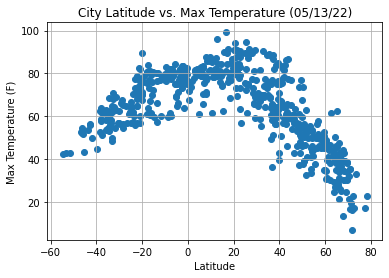

In [7]:
from scipy.stats import linregress

# Build a scatter plot for each data type
plt.scatter(cities_df["Lat"], cities_df["Max Temp"], marker="o")   #the symbol inside marker can also be "^"

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (05/13/22)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output/Fig1.png")

# Show plot
plt.show()

Latitude has an effect on temperature in the way that, the further the locations are from the ecuator the less light they receive. 
Therefore, their temperature drop as we can see from this figure. The temperatures are lower on the far left and on the far right of our figure.

## Latitude vs. Humidity Plot

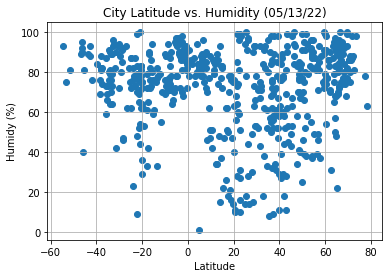

In [8]:
from scipy.stats import linregress

# Build a scatter plot for each data type
plt.scatter(cities_df["Lat"], cities_df["Humidity"], marker="o")   #the symbol inside marker can also be "^"

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (05/13/22)")
plt.ylabel("Humidy (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output/Fig2.png")

# Show plot
plt.show()

Humidity is higher in locations that are further from the ecuator

## Latitude vs. Cloudiness Plot

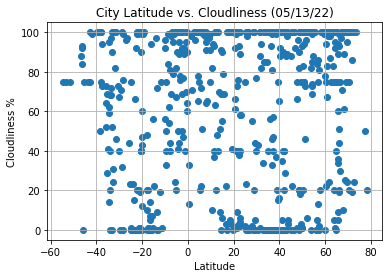

In [9]:
from scipy.stats import linregress

# Build a scatter plot for each data type
plt.scatter(cities_df["Lat"], cities_df["Cloudiness"], marker="o")   #the symbol inside marker can also be "^"

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudliness (05/13/22)")
plt.ylabel("Cloudliness %")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output/Fig3.png")

# Show plot
plt.show()

This scatter plot shows that there are more clouds on locations on the North than there are on the South

## Latitude vs. Wind Speed Plot

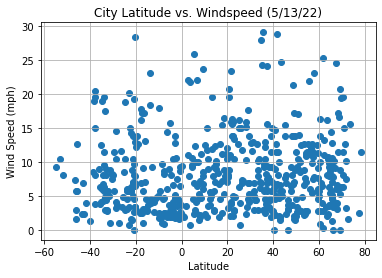

In [10]:
from scipy.stats import linregress

# Build a scatter plot for each data type
plt.scatter(cities_df["Lat"], cities_df["Wind Speed"], marker="o")   #the symbol inside marker can also be "^"

# Incorporate the other graph properties
plt.title("City Latitude vs. Windspeed (5/13/22)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output/Fig4.png")

# Show plot
plt.show()

The majority of these locations have wind speeds between 0mph and 15mph

## Linear Regression

In [11]:
# Show only Latitude greater or equal to 0 
northern_df = cities_df.loc[(
    cities_df["Lat"] >= 0)]
northern_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tara,56.8944,74.3710,57.69,49,86,9.86,RU,1652480575
1,Grindavik,63.8424,-22.4338,40.95,65,75,10.36,IS,1652480576
3,Northam,51.0333,-4.2167,52.66,91,46,8.93,GB,1652480577
4,Tiksi,71.6872,128.8694,16.52,87,19,10.11,RU,1652480577
5,Chaohu,31.6000,117.8667,58.57,75,88,5.68,CN,1652480578


In [12]:
# Show only Latitude less than 0 
southern_df = cities_df.loc[(
    cities_df["Lat"] < 0)]
southern_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,Ushuaia,-54.8000,-68.3000,42.46,93,75,9.22,AR,1652480343
12,Busselton,-33.6500,115.3333,61.84,70,72,17.43,AU,1652480582
16,Santa Maria,-29.6842,-53.8069,56.50,88,0,5.75,BR,1652480584
17,Padang,-0.9492,100.3543,76.41,81,70,4.29,ID,1652480584
19,Rikitea,-23.1203,-134.9692,77.54,73,66,20.15,PF,1652480585


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

r-value is: -0.8423657420780641
R squared: 0.7095800434267276
pvalue: 2.6777002514766384e-100


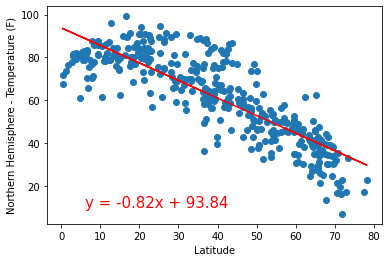

In [37]:
from scipy.stats import linregress
## Convert to floats and store as Latitude and Temperature as x and y values
x_values = northern_df['Lat'].astype('float')
y_values = northern_df['Max Temp'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Northern Hemisphere - Temperature (F)')

# Print r-value, r square value, and pvalue
print(f"r-value is: {rvalue}")
print(f"R squared: {rvalue**2}")
print(f"pvalue: {pvalue}")

# Show plot
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

r-value is: 0.7796201140817002
R squared: 0.6078075222807632
pvalue: 7.31586998399307e-40


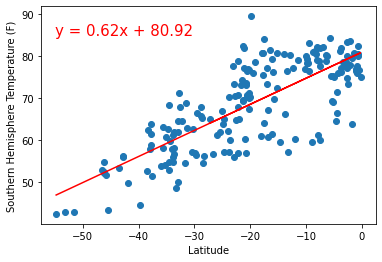

In [17]:
from scipy.stats import linregress
## Convert to floats and store Latitude and Temperature as x and y values
x_values = southern_df['Lat'].astype('float')
y_values = southern_df['Max Temp'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,85),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Southern Hemisphere Temperature (F)')

# Print r-value, r square value, and pvalue
print(f"r-value is: {rvalue}")
print(f"R squared: {rvalue**2}")
print(f"pvalue: {pvalue}")
# Show plot
plt.show()

There is a strong correlation between where a location is and its temperature. The above two plots show us that temperature decreases
as the location moves away from the center of 0. This is because the further away the locations are from the ecuator the lower the temperatures
because they get less direct sunlight.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

r-value is: 0.190043305088225
R squared: 0.03611645780885617
pvalue: 0.0002456714384517892


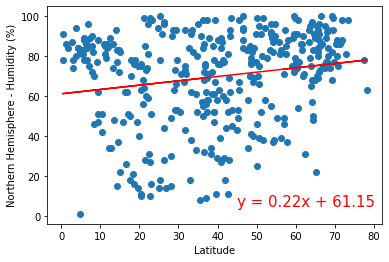

In [31]:
from scipy.stats import linregress
## Convert to floats and store Latitude and Humidity as x and y values
x_values = northern_df['Lat'].astype('float')
y_values = northern_df['Humidity'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,5),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Northern Hemisphere - Humidity (%)')

# Print r-value, r square value, and pvalue
print(f"r-value is: {rvalue}")
print(f"R squared: {rvalue**2}")
print(f"pvalue: {pvalue}")

# Show plot
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

r-value is: 0.07136297028349974
R squared: 0.0050926735276836665
pvalue: 0.3291561708302806


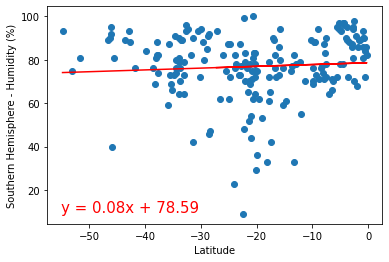

In [32]:
from scipy.stats import linregress
## Convert to floats and store Latitude and Humidity as x and y values
x_values = southern_df['Lat'].astype('float')
y_values = southern_df['Humidity'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Southern Hemisphere - Humidity (%)')

# Print r-value, r square value, and pvalue
print(f"r-value is: {rvalue}")
print(f"R squared: {rvalue**2}")
print(f"pvalue: {pvalue}")

# Show plot
plt.show()

The about two figures show us that there is not a strong correlation relationship between humidity and latitude. We can also see that by noting that their r-values are low, meaning that their relationship is not strong

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

r-value is: 0.02541761797398643
R squared: 0.000646055303471518
pvalue: 0.6269571274920455


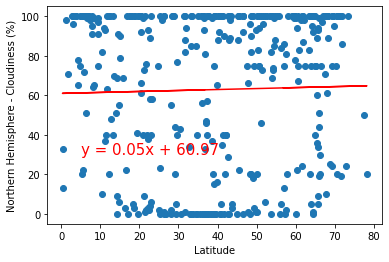

In [33]:
from scipy.stats import linregress
## Convert to floats and store Latitude and Cloudiness as x and y values
x_values = northern_df['Lat'].astype('float')
y_values = northern_df['Cloudiness'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,30),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Northern Hemisphere - Cloudiness (%)')

# Print r-value, r square value, and pvalue
print(f"r-value is: {rvalue}")
print(f"R squared: {rvalue**2}")
print(f"pvalue: {pvalue}")

# Show plot
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

r-value is: 0.05356648985811275
R squared: 0.002869368835719296
pvalue: 0.46413322282547986


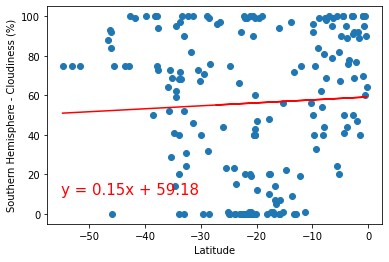

In [34]:
from scipy.stats import linregress
## Convert to floats and store Latitude and Cloudiness as x and y values
x_values = southern_df['Lat'].astype('float')
y_values = southern_df['Cloudiness'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Southern Hemisphere - Cloudiness (%)')

# Print r-value, r square value, and pvalue
print(f"r-value is: {rvalue}")
print(f"R squared: {rvalue**2}")
print(f"pvalue: {pvalue}")

# Show plot
plt.show()

The above two figures show us that there is no strong correlation relationship between latitude and cloudiness

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

r-value is: -0.02324157166831107
R squared: 0.0005401706536132398
pvalue: 0.6567578430075823


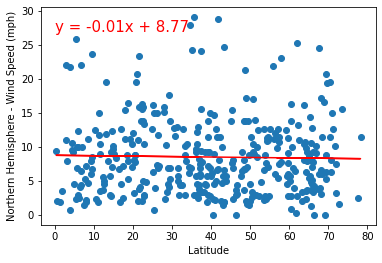

In [38]:
from scipy.stats import linregress
## Convert to floats and store Latitude and Wind Speed as x and y values
x_values = northern_df['Lat'].astype('float')
y_values = northern_df['Wind Speed'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,27),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Northern Hemisphere - Wind Speed (mph)')

# Print r-value, r square value, and pvalue
print(f"r-value is: {rvalue}")
print(f"R squared: {rvalue**2}")
print(f"pvalue: {pvalue}")

# Show plot
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

r-value is: -0.17909733522099755
R squared: 0.03207585548326237
pvalue: 0.013670090695824519


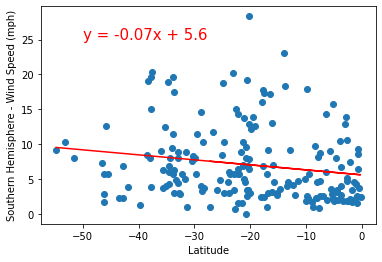

In [39]:
from scipy.stats import linregress
## Convert to floats and store Latitude and Wind Speed as x and y values
x_values = southern_df['Lat'].astype('float')
y_values = southern_df['Wind Speed'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,25),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Southern Hemisphere - Wind Speed (mph)')

# Print r-value, r square value, and pvalue
print(f"r-value is: {rvalue}")
print(f"R squared: {rvalue**2}")
print(f"pvalue: {pvalue}")

# Show plot
plt.show()

The last two figures show is that there is no strong correlation relationship between wind speed and latitude on the Southern nor Northern Hemisphere